In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
runName = 'minion_1016'
opsdb = db.OpsimDatabase(runName + '_sqlite.db')
outDir = 'allvis'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []

propids, propTags = opsdb.fetchPropInfo()
WFDpropid = propTags['WFD']
wfdWhere = utils.createSQLWhere('WFD', propTags)

sqlconstraint = wfdWhere
slicer = slicers.OpsimFieldSlicer()
metric = metrics.CountMetric(col='expMJD', metricName='NVisits')
metadata = 'All filters, WFD'
plotDict = {'xlabel': 'Number of Visits', 'binsize': 5, 'cumulative': False,
            'xMin': 500, 'xMax': 1500}


bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, plotDict=plotDict,
                                    runName=runName, metadata=metadata)
bundleList.append(bundle)

metadata = 'All Filters'
sqlconstraint = ''
plotDict = {'xlabel': 'Number of Visits', 'binsize': 5, 'cumulative': False,
            'xMax': 1500, 'colorMin': 150, 'colorMax': 1200}
slicer = slicers.OpsimFieldSlicer()
bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, plotDict=plotDict,
                                    runName=runName, metadata=metadata)
bundleList.append(bundle)

In [4]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with no constraint.
Found 2447931 visits
Running:  ['minion_1016_NVisits_All_Filters_OPSI']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint propID = 54
Found 2083758 visits
Running:  ['minion_1016_NVisits_All_filters_WFD_OPSI']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:91: UserWarning: Warning: this OpsimFieldSlicer was already set up once. Re-setting up an OpsimFieldSlicer can change the field information. Rerun metrics if this was intentional. 
  warnings.warn(warning_msg)


Plotting figures with  constraint now.
Plotting complete.
Plotting figures with propID = 54 constraint now.
Plotting complete.


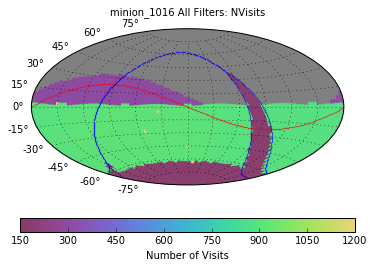

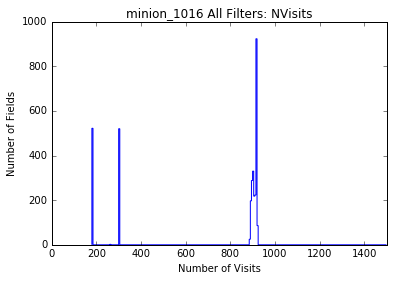

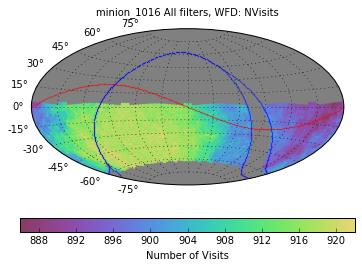

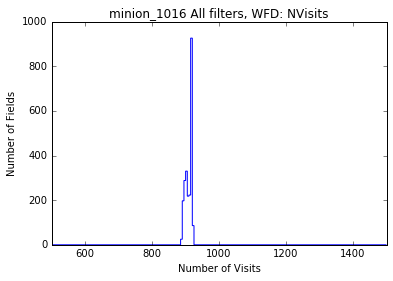

In [5]:
bgroup.plotAll(closefigs=False)